In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from evaluation.evaluation import Evaluation
from utils import load_yaml_param_settings

In [2]:
# settings
dataset_name = 'custom'

in_channels = 2  # number of channels
input_length = 100  # length of your custom data
n_classes = 2  # number of classes of your custom data

n_samples = 100  # number of synthetic time series to sample
gpu_device_idx = 0
use_fidelity_enhancer = False

In [3]:
# load a model wrapper for the evaluation
config = load_yaml_param_settings(os.path.join('configs', 'config.yaml'))
evaluation = Evaluation(dataset_name, 
                        in_channels,
                        input_length, 
                        n_classes, 
                        gpu_device_idx, 
                        config, 
                        use_fidelity_enhancer=use_fidelity_enhancer,
                        use_custom_dataset=True,
                        ).to(gpu_device_idx)

sampling...
channel idx: 0


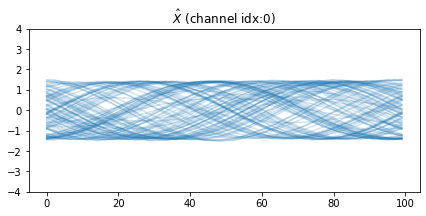

channel idx: 1


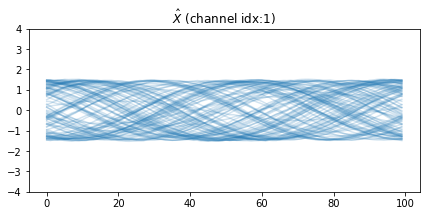

In [13]:
# unconditional sampling
# xhat_R == xhat if `use_fidelity_enhancer` is False
# xhat_R == FE(xhat) if `use_fidelity_enhancer` is True
(_, _, xhat), xhat_R = evaluation.sample(n_samples, 'unconditional')

b, c, l = xhat.shape

print('===========================================================')
for channel_idx in range(c):
    print('channel idx:', channel_idx)

    ylim = (-4, 4)
    plt.figure(figsize=(7,3))
    plt.plot(xhat[:,channel_idx,:].T, color='C0', alpha=0.2)
    plt.title(r'$\hat{X}$' + f' (channel idx:{channel_idx})')
    plt.ylim(*ylim)
    plt.show()

    if use_fidelity_enhancer:
        plt.figure(figsize=(7,3))
        plt.plot(xhat_R[:,channel_idx,:].T, color='C0', alpha=0.2)
        plt.title(r'$\hat{X}_R$' + f' (channel idx:{channel_idx})')
        plt.ylim(*ylim)
        plt.show()

    print('===========================================================')

sampling...
channel idx: 0


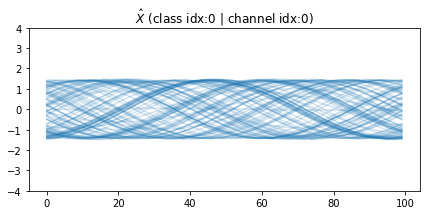

channel idx: 1


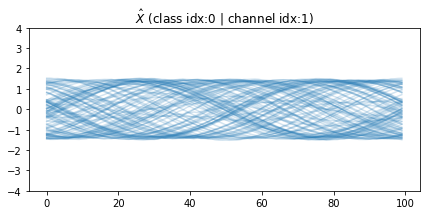

In [16]:
# class-conditional sampling
# xhat_R == xhat if `use_fidelity_enhancer` is False
# xhat_R == FE(xhat) if `use_fidelity_enhancer` is True
class_index = 0
(_, _, xhat), xhat_R = evaluation.sample(n_samples, 'conditional', class_index)

b, c, l = xhat.shape

print('===========================================================')
for channel_idx in range(c):
    print('channel idx:', channel_idx)

    plt.figure(figsize=(7,3))
    plt.plot(xhat[:,channel_idx,:].T, color='C0', alpha=0.2)
    plt.title(r'$\hat{X}$' + ' ' + f'(class idx:{class_index} | channel idx:{channel_idx})')
    plt.ylim(*ylim)
    plt.show()

    if use_fidelity_enhancer:
        plt.figure(figsize=(7,3))
        plt.plot(xhat_R[:,channel_idx,:].T, color='C0', alpha=0.2)
        plt.title(r'$\hat{X}_R$' + ' ' + f'(class idx:{class_index} | channel idx:{channel_idx})')
        plt.ylim(*ylim)
        plt.show()
    
    print('===========================================================')